## Prediciting Brain Weight
### Simple Linear Regression Model

#### In this analysis we will looking at brain data and create a model to predict the the weight of a brain in grams using the gender, age range and head size of a person. 

### Imports 

In [325]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
plt.style.use('dark_background')
import seaborn as sns

### Reading The Data In

In [326]:
# dataset downloaded from kaggle
brain_df = pd.read_csv('brain.csv')
brain_df.head()

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


Gender: 1 represents male and 2 represents female.

Age Range: 1 represents greater than 18 years old, 2 represents less than 18 years old.

Head Size: volume of head in cubic centimeters.

Brain Weight: weight of brain in grams. 

In [327]:
brain_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237 entries, 0 to 236
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Gender               237 non-null    int64
 1   Age Range            237 non-null    int64
 2   Head Size(cm^3)      237 non-null    int64
 3   Brain Weight(grams)  237 non-null    int64
dtypes: int64(4)
memory usage: 7.5 KB


In [328]:
# checking for missing values
brain_df.isnull().sum()

Gender                 0
Age Range              0
Head Size(cm^3)        0
Brain Weight(grams)    0
dtype: int64

In [329]:
# dropping duplicates
brain_df.drop_duplicates()

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590
...,...,...,...,...
232,2,2,3214,1110
233,2,2,3394,1215
234,2,2,3233,1104
235,2,2,3352,1170


In [330]:
# renaming columm names
brain_df.rename(columns={'Gender': 'gender','Age Range':'agerange', 'Head Size(cm^3)':'headsize', 'Brain Weight(grams)':'brainweight'}, inplace=True)

### Data Exploration

In [331]:
brain_copy = brain_df.copy()
brain_copy.agerange = brain_copy.agerange.astype(str)
brain_copy.gender = brain_copy.gender.astype(str)

In [332]:
brain_copy.dtypes

gender         object
agerange       object
headsize        int64
brainweight     int64
dtype: object

In [333]:
brain_copy['agerange'] = brain_copy['agerange'].map({'1':'greater_than_18', '2': 'less_than_18'})
brain_copy['gender'] = brain_copy['gender'].map({'1':'male', '2': 'female'})

In [334]:
brain_copy

,gender,agerange,headsize,brainweight
0,male,greater_than_18,4512,1530
1,male,greater_than_18,3738,1297
2,male,greater_than_18,4261,1335
3,male,greater_than_18,3777,1282
4,male,greater_than_18,4177,1590
...,...,...,...,...
232,female,less_than_18,3214,1110
233,female,less_than_18,3394,1215
234,female,less_than_18,3233,1104
235,female,less_than_18,3352,1170


In [335]:
sns.set_palette("GnBu_d")
#sns.set_style('whitegrid')

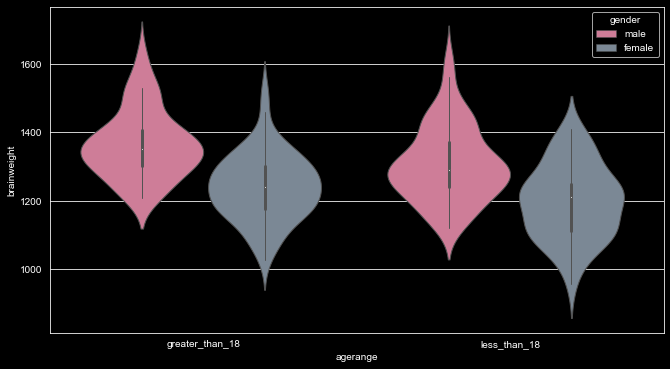

In [336]:
# Age Range and Brain Weight by Gender
plt.figure(figsize=(11,6))
sns.violinplot(data = brain_copy, x='agerange',y='brainweight', hue ='gender', linewidth = 1, 
               palette={'male': "palevioletred", 'female': "lightslategrey"})

There are two main observations that we can make. The first is that make brain weight tends to be heavier than womens across the board and the second, brain weight tends to be larger for people that are greater than 18 years old.

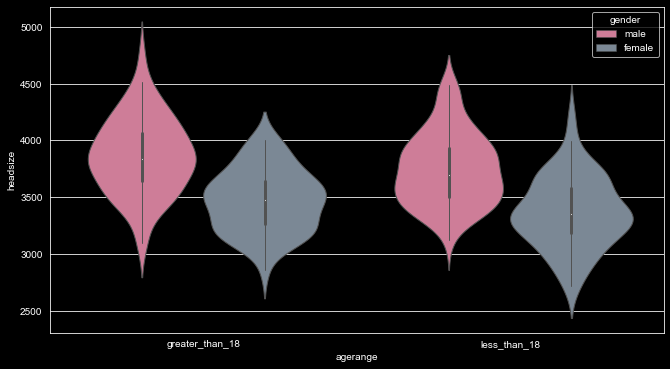

In [337]:
# Age Range and Head Size by Gender
plt.figure(figsize=(11,6))
sns.violinplot(data = brain_copy, x='agerange',y='headsize', hue ='gender', linewidth = 1, 
               palette={'male': "palevioletred", 'female': "lightslategrey"})

Males have a greater head size than females and headzise is slightly greater for people who are above 18 years old. 

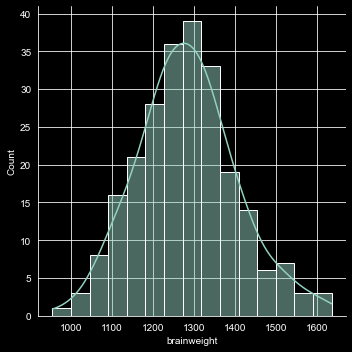

In [338]:
# distrubution of Brain Weight 
sns.displot(brain_df['brainweight'], kde=True)

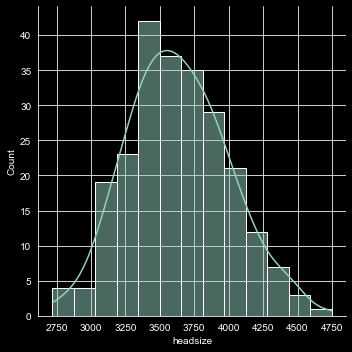

In [339]:
# distribution of Brain Size
sns.displot(brain_df['headsize'], kde = True)

The distruniton sof head size and brain weight are approximately normal. 

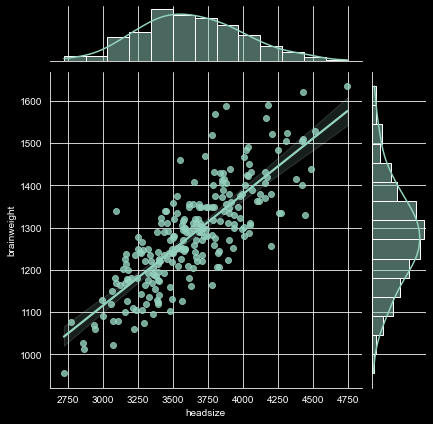

In [340]:
# plot of head size and brain weight 
sns.jointplot(data = brain_df, x='headsize', y ='brainweight', kind = 'reg')

Here we see that there is a positive linear realtionship between brain weight and head size.

Lets see if the correlation between the variables in this dataset.

In [341]:
brain_df

,gender,agerange,headsize,brainweight
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590
...,...,...,...,...
232,2,2,3214,1110
233,2,2,3394,1215
234,2,2,3233,1104
235,2,2,3352,1170


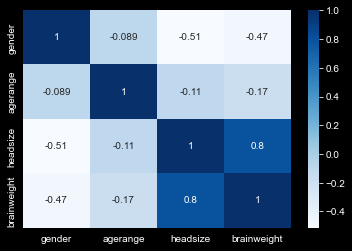

In [342]:
sns.heatmap(brain_df.corr(), cmap = 'Blues', annot=True)

### Defining X and Y 

This dataset shows the head sizes annd masses of brains. Our goal is to conduct linear regression on this data to estimate our DEPENDENT variable which is Brain Weight in grams. 
Our INDEPENDENT variables are gender, age range, and head size. 

In [343]:
# defining x values
X = brain_df[['agerange','gender','headsize']]

In [344]:
# defining y values 
y = brain_df['brainweight']

### Spitting data into Training and Test sets

In [345]:
# splitting up data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.33, random_state= 4)

### Training Our Model

In [346]:
# Creating linear model
lm = LinearRegression()

# fitting data
lm.fit(X_train, y_train)

LinearRegression()

In [347]:
# model coefficients
lm.coef_

array([-20.10503969,  -1.59003302,   0.25704598])

### Predict Test Results

In [348]:
y_predict= lm.predict(X_test)

### Model Evaluation 


In [349]:
r2= r2_score(y_test, y_predict)
r2

0.6505548049313274

As we can see here, our R2 score is almost 65%.

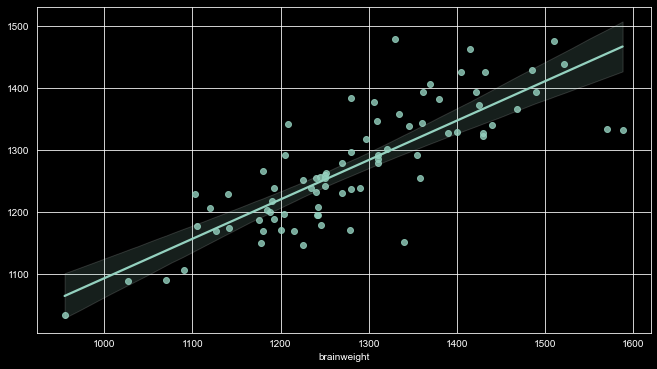

In [350]:
plt.figure(figsize =(11,6))
sns.regplot(x=y_test, y=y_predict)


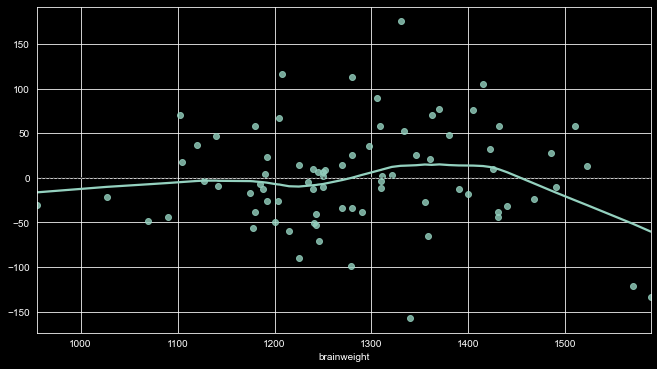

In [351]:
plt.figure(figsize =(11,6))
sns.residplot(x=y_test, y=y_predict, lowess=True)

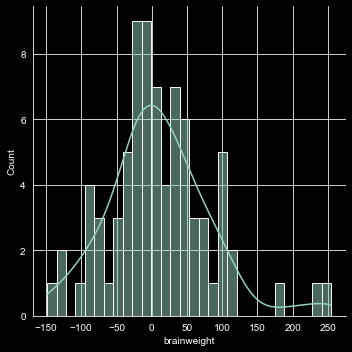

In [352]:
sns.displot((y_test-y_predict), bins = 30, kde=True)

## Conlusion 


In [353]:
df= pd.DataFrame( data = lm.coef_, columns = ['Coefficient'] ,index = X_train.columns)
df.head()

,Coefficient
agerange,-20.105040
gender,-1.590033
headsize,0.257046


* Age Range decreases the Brain Weight by -20 units when <18 years old. 
* Gender decreases Brain Weight by -1.6 units when subject is a female. 
* Head Size increases Brain Weight but 0.25 when for every cubic centimeter. 

Looking at these coefficients, we can see that headsize has little influence with brain weight. When predicting brain weight, there is a stronger negative correlation with the age range. 